# Import Data

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ALlow showing all columns
pd.set_option('display.max_columns', None)

In [2]:
# Import train.csv
df_train_dtypes = {"Store": int, 
                   "DayOfWeek": int,
                  "Date": "str",
                   "Sales": int,
                   "Customers": int,
                   "Open": int,
                   "Promo": int,
                   "StateHoliday": "str",
                   "SchoolHoliday": int}
df_train = pd.read_csv("../data/train.csv", dtype=df_train_dtypes, 
                       parse_dates=["Date"])
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [3]:
# Import store.csv
df_store_dtypes = {"Store": int, 
                   "StoreType": "str",
                  "Assortment": "str",
                    "PromoInterval": "str"}
df_store = pd.read_csv("../data/store.csv", dtype=df_store_dtypes)
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Make a copy of original data frames
df_train_original = df_train.copy()
df_store_original = df_store.copy()

# Data Cleaning and Feature Exploration

In [5]:
# Check unique values for StateHoliday and SchoolHoliday
print(df_train["StateHoliday"].unique())
print(df_train["SchoolHoliday"].unique())

['0' 'b' 'a' 'c']
[0 1]


In [6]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          914629 non-null  int64         
 1   DayOfWeek      914629 non-null  int64         
 2   Date           914629 non-null  datetime64[ns]
 3   Sales          914629 non-null  int64         
 4   Customers      914629 non-null  int64         
 5   Open           914629 non-null  int64         
 6   Promo          914629 non-null  int64         
 7   StateHoliday   914629 non-null  object        
 8   SchoolHoliday  914629 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 62.8+ MB


In [8]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Sort data by date

In [10]:
# Sort data by date
df_train.sort_values(by=["Date"], inplace=True, ascending=True)
df_train.head()
# unnecessary as regression models were used in the end and not timeseries

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914628,1115,2,2013-01-01,0,0,0,0,a,1
913893,379,2,2013-01-01,0,0,0,0,a,1
913892,378,2,2013-01-01,0,0,0,0,a,1
913891,377,2,2013-01-01,0,0,0,0,a,1
913890,376,2,2013-01-01,0,0,0,0,a,1


### Add datetime parameters for `Date` column

In [11]:
df_train["saleYear"] = df_train.Date.dt.year
df_train["saleMonth"] = df_train.Date.dt.month
df_train["saleDay"] = df_train.Date.dt.week
df_train["saleDayOfYear"] = df_train.Date.dt.dayofyear
df_train["saleWeekOfYear"] = df_train.Date.dt.weekofyear
df_train = df_train.rename(columns={"DayOfWeek": "saleDayOfWeek"})
df_train.head()

,Store,saleDayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleWeekOfYear
914628,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
913893,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
913892,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
913891,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
913890,376,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1


In [12]:
# Rearrange columns
df_train = df_train[['Store', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayOfYear', 'saleDayOfWeek', 'saleWeekOfYear', 'Date']]
df_train.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date
914628,1115,0,0,0,0,a,1,2013,1,1,1,2,1,2013-01-01
913893,379,0,0,0,0,a,1,2013,1,1,1,2,1,2013-01-01
913892,378,0,0,0,0,a,1,2013,1,1,1,2,1,2013-01-01
913891,377,0,0,0,0,a,1,2013,1,1,1,2,1,2013-01-01
913890,376,0,0,0,0,a,1,2013,1,1,1,2,1,2013-01-01


## Check stores which are closed

In [13]:
df_train.groupby("Open")["Sales"].sum()

Open
0             0
1    5264350737
Name: Sales, dtype: int64

It can be seen that stores where `Open = 0` have 0 sales. To prevent bias all stores with 0 sales will be removed from the dataset. It can be automatically assumed that all Closed stores will have 0 sales.

In [14]:
df_train = df_train[df_train.Open == 1]
df_train = df_train.drop("Open", axis=1)

### Join df_train and df_store, find a way to use df_store in dataset

In [15]:
df_merged = df_train.join(df_store.set_index('Store'), on='Store')

In [16]:
# Save original df
df_merged_original = df_merged
df_merged.head()

,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
913867,353,3139,820,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
913849,335,2401,482,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
914026,512,2646,625,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
914008,494,3113,527,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
914044,530,2907,532,0,a,1,2013,1,1,1,2,1,2013-01-01,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
df_merged = df_merged.reset_index()
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,913867,353,3139,820,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,913849,335,2401,482,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2,914026,512,2646,625,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
3,914008,494,3113,527,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
4,914044,530,2907,532,0,a,1,2013,1,1,1,2,1,2013-01-01,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


In [18]:
# Create function for "HasCompetition" column
def competition(c):
    compYear = int(c["CompetitionOpenSinceYear"]) if not pd.isna(c["CompetitionOpenSinceYear"]) else -1
    compMonth = int(c["CompetitionOpenSinceMonth"]) if not pd.isna(c["CompetitionOpenSinceMonth"]) else -1
    if c["saleYear"] == compYear:
        if c["saleMonth"] < compMonth:
            return 0
        else:
            return 1
    elif c["saleYear"] > compYear:
        return 1
    else:
        return 0

`HasCompetition` column will be based on "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" being compared with the sales date columns. 

Basically:

if the competition hasn't opened yet, `HasCompetition` = 0.

Otherwise `HasCompetition` = 1 

Additionally, if "CompetitionOpenSince...." columns are NaN, it will be assumed that the stores always had competition.

In [19]:
df_merged['HasCompetition'] = df_merged.apply(competition, axis=1)

In [20]:
# Drop old competition columns
df_merged = df_merged.drop(columns=["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"])
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HasCompetition
0,913867,353,3139,820,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,900.0,1,14.0,2013.0,"Feb,May,Aug,Nov",1
1,913849,335,2401,482,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,90.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1
2,914026,512,2646,625,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,590.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",1
3,914008,494,3113,527,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,1260.0,0,NaN,NaN,NaN,1
4,914044,530,2907,532,0,a,1,2013,1,1,1,2,1,2013-01-01,a,c,18160.0,0,NaN,NaN,NaN,1


In [21]:
# Create function for 'HasPromo2' column
def promo(row):
    promoYear = int(row["Promo2SinceYear"]) if not pd.isna(row["Promo2SinceYear"]) else -1
    promoWeek = int(row["Promo2SinceWeek"]) if not pd.isna(row["Promo2SinceWeek"]) else -1
    promoMonthList = row["PromoInterval"].split(",") if not pd.isna(row["PromoInterval"]) else []
    
#     Replace month strings with integer
    monthDict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sept": 9, "Oct": 10,
                "Nov": 11, "Dec": 12}
    for idx, month in enumerate(promoMonthList):
        for k in monthDict:
            if k in month:
                promoMonthList[idx] = month.replace(k, str(monthDict[k]))
    promoMonthList = list(map(int, promoMonthList)) 
        
    if row["saleYear"] > promoYear:
        if row["saleMonth"] in promoMonthList:
            return 1
    elif row["saleYear"] == promoYear:
        if row["saleWeekOfYear"] >= promoWeek:
            if row["saleMonth"] in promoMonthList:
                return 1
    return 0            

`HasPromo2` column will be used to determine whether or not the row at that point in time has an active Promo2. This will be determined by checking whether "Promo2SinceWeek" and "Promo2SinceYear" have started when compared with the sales date data. Afterwards the "PromoInterval" will be checked - whether or not the current month falls within the interval.

`HasPromo2` = 1 if above conditions are satisfied

Otherwise, `HasPromo2` = 0

In [22]:
df_merged["HasPromo2"] = df_merged.apply(promo, axis=1)
df_merged.head()

,index,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,Date,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HasCompetition,HasPromo2
0,913867,353,3139,820,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,900.0,1,14.0,2013.0,"Feb,May,Aug,Nov",1,0
1,913849,335,2401,482,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,90.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,0
2,914026,512,2646,625,0,a,1,2013,1,1,1,2,1,2013-01-01,b,b,590.0,1,5.0,2013.0,"Mar,Jun,Sept,Dec",1,0
3,914008,494,3113,527,0,a,1,2013,1,1,1,2,1,2013-01-01,b,a,1260.0,0,NaN,NaN,NaN,1,0
4,914044,530,2907,532,0,a,1,2013,1,1,1,2,1,2013-01-01,a,c,18160.0,0,NaN,NaN,NaN,1,0


In [23]:
# Drop irrelevant columns (Promo2 related, Date, Index)
df_merged = df_merged.drop(columns=["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval", "Date", "index"])
df_merged.head()

,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,saleYear,saleMonth,saleDay,saleDayOfYear,saleDayOfWeek,saleWeekOfYear,StoreType,Assortment,CompetitionDistance,HasCompetition,HasPromo2
0,353,3139,820,0,a,1,2013,1,1,1,2,1,b,b,900.0,1,0
1,335,2401,482,0,a,1,2013,1,1,1,2,1,b,a,90.0,1,0
2,512,2646,625,0,a,1,2013,1,1,1,2,1,b,b,590.0,1,0
3,494,3113,527,0,a,1,2013,1,1,1,2,1,b,a,1260.0,1,0
4,530,2907,532,0,a,1,2013,1,1,1,2,1,a,c,18160.0,1,0


### Check for NaN columns

In [24]:
df_merged.isnull().any()

Store                  False
Sales                  False
Customers              False
Promo                  False
StateHoliday           False
SchoolHoliday          False
saleYear               False
saleMonth              False
saleDay                False
saleDayOfYear          False
saleDayOfWeek          False
saleWeekOfYear         False
StoreType              False
Assortment             False
CompetitionDistance     True
HasCompetition         False
HasPromo2              False
dtype: bool

### Use median as imputation method for "ComputationDistance"

In [25]:
df_merged.fillna(df_merged.median(), inplace=True)
df_merged.isnull().any()

Store                  False
Sales                  False
Customers              False
Promo                  False
StateHoliday           False
SchoolHoliday          False
saleYear               False
saleMonth              False
saleDay                False
saleDayOfYear          False
saleDayOfWeek          False
saleWeekOfYear         False
StoreType              False
Assortment             False
CompetitionDistance    False
HasCompetition         False
HasPromo2              False
dtype: bool

## Explore some more data

In [26]:
df_merged.groupby("Promo")["Sales"].mean()

Promo
0    5901.531344
1    8204.655851
Name: Sales, dtype: float64

In [27]:
df_merged.groupby("HasPromo2")["Sales"].mean()

HasPromo2
0    7011.287246
1    6441.638872
Name: Sales, dtype: float64

In [28]:
df_merged.groupby("StoreType")["Sales"].mean()

StoreType
a     6905.986379
b    10142.030002
c     6916.115287
d     6777.629781
Name: Sales, dtype: float64

In [29]:
df_merged.groupby("Assortment")["Sales"].mean()

Assortment
a    6606.820067
b    8495.498781
c    7259.191751
Name: Sales, dtype: float64

In [30]:
df_merged.groupby("saleYear")["Sales"].mean()

saleYear
2013    6814.392025
2014    7025.404201
2015    6998.948880
Name: Sales, dtype: float64

In [31]:
df_merged.groupby("StateHoliday")["Sales"].mean()

StateHoliday
0    6925.962123
a    8220.314176
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64

In [32]:
df_merged.groupby("saleDayOfWeek")["Sales"].mean()

saleDayOfWeek
1    8183.070805
2    7050.117394
3    6689.042329
4    6753.220681
5    7045.639970
6    5856.718290
7    8216.643037
Name: Sales, dtype: float64

In [33]:
df_merged.groupby("saleMonth")["Sales"].mean()

saleMonth
1     6563.690444
2     6589.165535
3     6976.412026
4     7046.228420
5     7010.020102
6     6846.331727
7     6908.727396
8     6648.984654
9     6546.343035
10    6602.843354
11    7188.554250
12    8608.956661
Name: Sales, dtype: float64

In [34]:
df_merged.groupby("HasCompetition")["Sales"].mean()

HasCompetition
0    7209.673114
1    6899.346909
Name: Sales, dtype: float64

In [35]:
df_merged.dtypes

Store                    int64
Sales                    int64
Customers                int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
saleYear                 int64
saleMonth                int64
saleDay                  int64
saleDayOfYear            int64
saleDayOfWeek            int64
saleWeekOfYear           int64
StoreType               object
Assortment              object
CompetitionDistance    float64
HasCompetition           int64
HasPromo2                int64
dtype: object

### Convert object columns to category data type
Namely StateHoliday, StoreType, and Assortment

In [36]:
df_merged["StateHoliday"] = df_merged["StateHoliday"].astype('category')
df_merged["StoreType"] = df_merged["StoreType"].astype('category')
df_merged["Assortment"] = df_merged["Assortment"].astype('category')
df_merged["SchoolHoliday"] = df_merged["SchoolHoliday"].astype('category')
df_merged["HasCompetition"] = df_merged["HasCompetition"].astype('category')
df_merged["HasPromo2"] = df_merged["HasPromo2"].astype('category')
df_merged["Store"] = df_merged["Store"].astype('category')

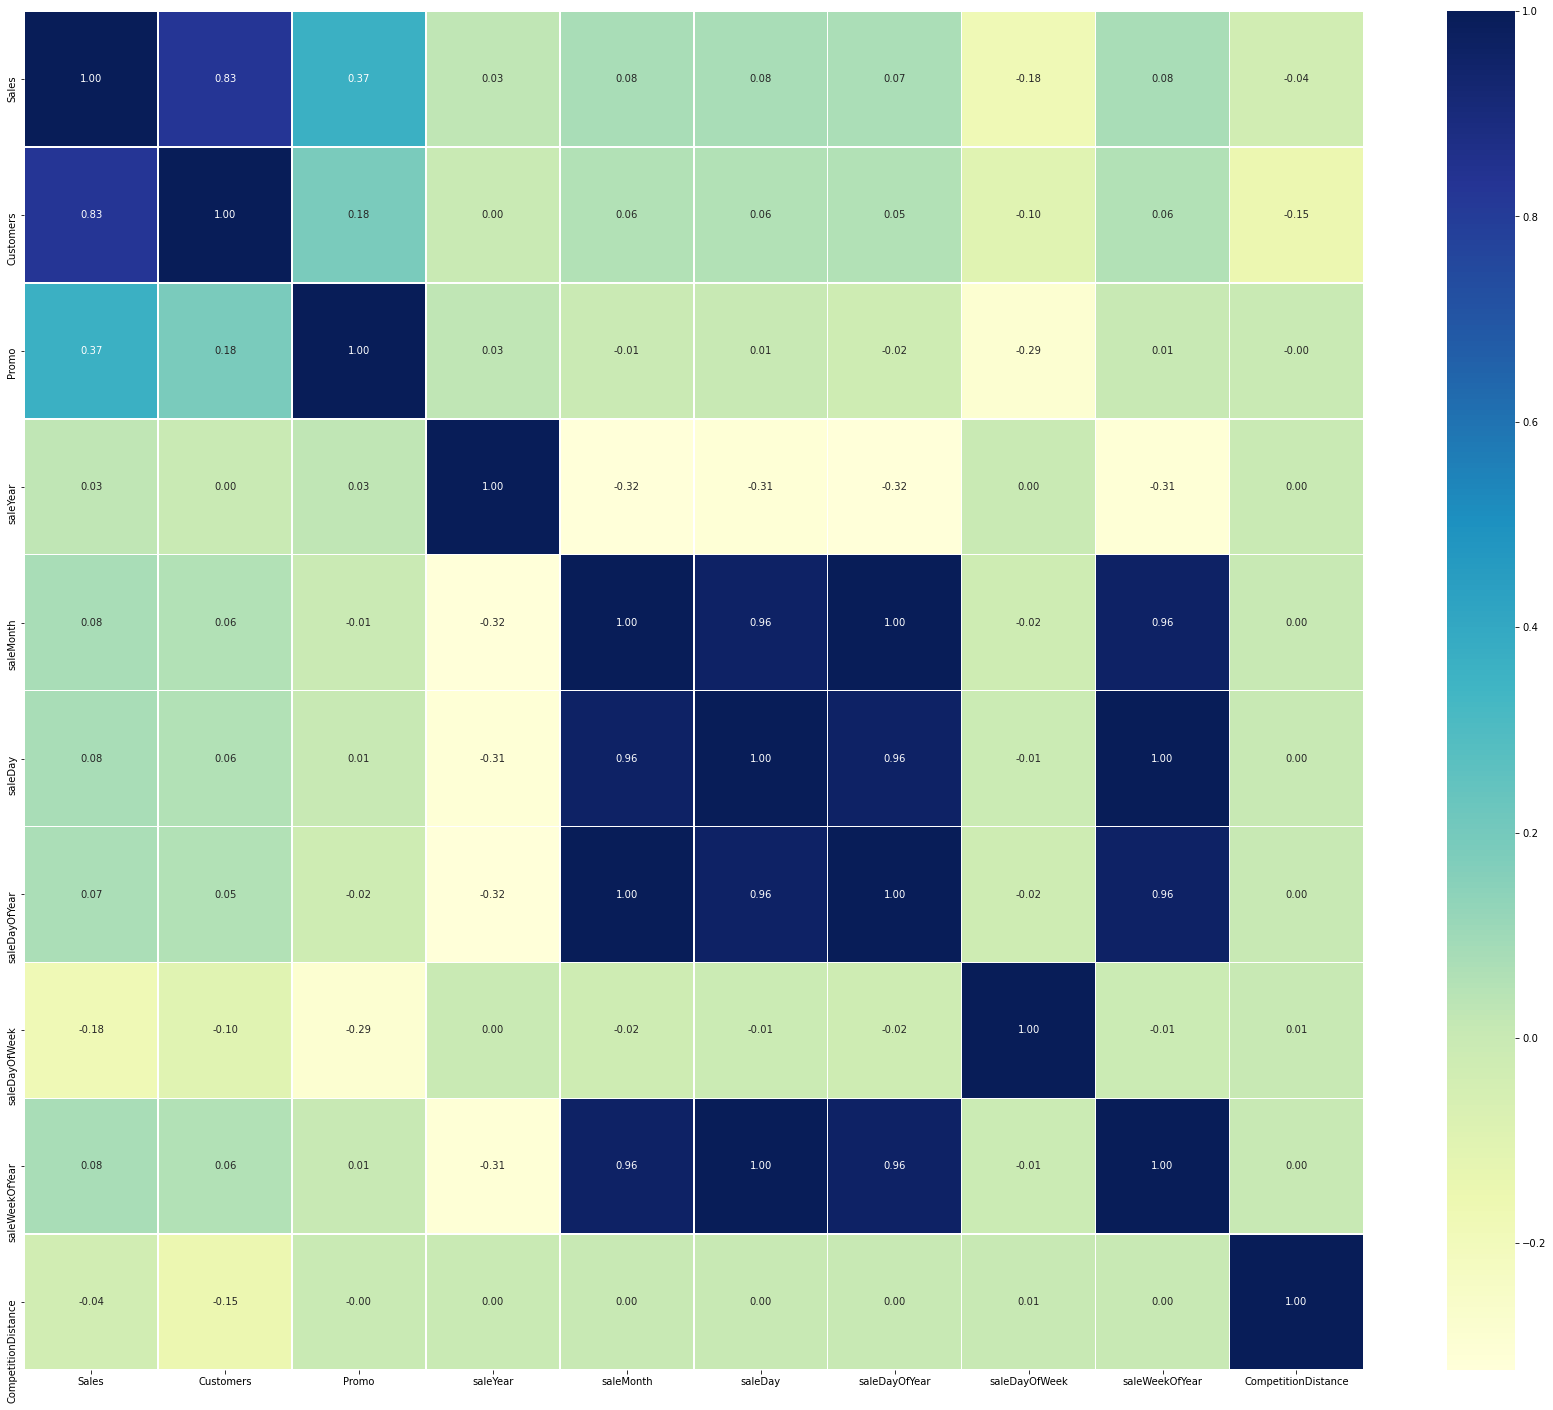

In [37]:
# Make a correlation matrix
corr_matrix = df_merged.corr(method="pearson")
fig, ax = plt.subplots(figsize=(30,25))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

It can be seen that <b>Customer</b>, <b>Promo</b>, and <b>saleDayOfWeek</b> have the highest impact on <b>Sales</b>

# Modeling

In [38]:
# Split data into X and y
X = df_merged.drop("Sales", axis = 1)
y = df_merged["Sales"]
X.shape, y.shape

((759901, 16), (759901,))

In [39]:
from sklearn.model_selection import train_test_split
# Divide data into training, test, and validation (70-15-15 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1765, random_state=1)
X_train.shape, X_test.shape, X_valid.shape

((531911, 16), (113986, 16), (114004, 16))

In [40]:
# OneHotEncode categorical features, and scale other features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Setup preprocessing functions
def preprocess_X(data):
    # Define which features should be encoded vs scaled
    columns_to_encode = ["StateHoliday", "StoreType", "Assortment", "StateHoliday", "saleYear", "saleMonth", "saleDayOfWeek"]
    columns_to_scale  = ['Customers', 'CompetitionDistance']
    
    # Instantiate encoder/scaler
    scaler = StandardScaler()
    ohe = OneHotEncoder(sparse=False)

    # Scale and Encode Separate Columns
    scaled_columns = scaler.fit_transform(data[columns_to_scale]) 
    encoded_columns = ohe.fit_transform(data[columns_to_encode])

    # Concatenate (Column-Bind) Processed Columns Back Together
    processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)
    
    return processed_data

# def preprocess_y(data):
#     ohe = OneHotEncoder(sparse=False)
#     data = ohe.fit_transform(data["Sales"])
    
#     return data

In [47]:
# Preprocess all X data
X_train = preprocess_X(X_train)
X_valid = preprocess_X(X_valid)
X_test = preprocess_X(X_test)
X_train.shape

(531911, 39)

In [42]:
# Create evaluation function (Root Mean Square Log Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmse(y_train, train_preds),
              "Valid RMSLE": rmse(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

## First, let's try RandomForestRegressor with hyperparameters tuned using RandomizedSearchCV

In [61]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# max_samples using 10% of training data as this takes way too long
max_samples = round(X_train.shape[0]*0.1)
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [max_samples]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=3,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 29.2min finished


CPU times: user 29min 18s, sys: 5.75 s, total: 29min 24s
Wall time: 29min 24s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [53191],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 53191,
 'max_features': 'auto',
 'max_depth': None}

In [63]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 573.1175079838665,
 'Valid MAE': 689.2086201911877,
 'Training RMSLE': 816.7408554336373,
 'Valid RMSLE': 968.4132380581382,
 'Training R^2': 0.9308513835038044,
 'Valid R^2': 0.9019643946536849}

In [64]:
# Find the best score
rs_model.best_score_

0.9192401850668689

In [65]:
rs_model.score(X_test, y_test)

0.8937819430640622

## Create new model using best parameters
but with max samples

{'n_estimators': 40,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 53191,
 'max_features': 'auto',
 'max_depth': None}

In [69]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=8,
                                    max_features="auto",
                                    n_jobs=-1,
                                    max_samples=None)

ideal_model.fit(X_train, y_train)

CPU times: user 6min 37s, sys: 1.33 s, total: 6min 38s
Wall time: 35.5 s


RandomForestRegressor(min_samples_split=8, n_estimators=40, n_jobs=-1)

In [70]:
show_scores(ideal_model)

{'Training MAE': 273.66166523153134,
 'Valid MAE': 638.9074334491785,
 'Training RMSLE': 416.7523783471222,
 'Valid RMSLE': 966.2349498224806,
 'Training R^2': 0.9819959127894684,
 'Valid R^2': 0.9024049289723471}

In [71]:
ideal_model.score(X_test, y_test)

0.8822985855082229

## Next, let's try using SGDRegressor

In [79]:
%%time
from sklearn.linear_model import SGDRegressor
from scipy.stats import randint, uniform

sgd_grid = {"n_iter_no_change": randint(1, 11),
            "alpha": uniform(scale=0.01),
            "penalty": ["none", "l1", "l2"]
            }

sgd_model = RandomizedSearchCV(SGDRegressor(),
                              param_distributions=sgd_grid,
                              n_iter=100,
                              cv=3,
                              verbose=True)

sgd_model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 16.4min finished


CPU times: user 18min 41s, sys: 27.7 s, total: 19min 9s
Wall time: 16min 30s


RandomizedSearchCV(cv=3, estimator=SGDRegressor(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f240f312400>,
                                        'n_iter_no_change': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f240f326640>,
                                        'penalty': ['none', 'l1', 'l2']},
                   verbose=True)

In [80]:
sgd_model.best_params_

{'alpha': 0.008769744424086477, 'n_iter_no_change': 7, 'penalty': 'none'}

In [81]:
sgd_model.best_score_

0.8018433898901192

In [82]:
sgd_model.score(X_test, y_test)

0.8023995581705206

In [84]:
show_scores(sgd_model)

{'Training MAE': 1025.9555424362686,
 'Valid MAE': 1029.5439683569275,
 'Training RMSLE': 1382.528797777674,
 'Valid RMSLE': 1388.5370067030185,
 'Training R^2': 0.801864038525309,
 'Valid R^2': 0.7984525454917175}

## RandomForestRegressor scores better at ~88% vs SGDRegressor at ~80%

# Save ideal model

In [73]:
from joblib import dump

dump(ideal_model, 'RFR.joblib')

['RFR.joblib']